# All about linear regression with python

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Load the datasets
%run datasets.ipynb

## Testing assumption 1: target is normally distributed

AndersonResult(statistic=11.822483502722775, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


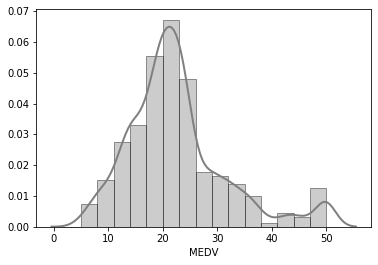

In [61]:
# Load the pre-assumptions file
%run pre_model_assumptions.ipynb

# dataset 1
target = 'MEDV'
stat_assumption = anderson_darling(df1, target)
print(stat_assumption)
# can also be tested by visual inspection
vis_analysis = plot_histogram(df1, target)

AndersonResult(statistic=12.186367389114253, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


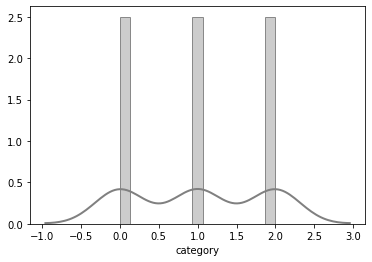

In [62]:
# dataset 2
target = 'category'
stat_assumption = anderson_darling(df2, target)
print(stat_assumption)
# can also be tested by visual inspection
vis_analysis = plot_histogram(df2, target)

AndersonResult(statistic=0.2477777302628965, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


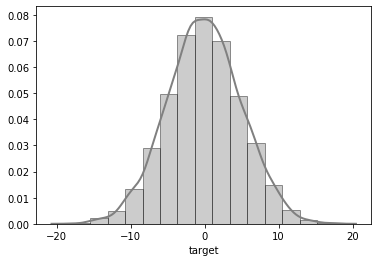

In [63]:
# dataset 3
target = 'target'
stat_assumption = anderson_darling(df3, target)
print(stat_assumption)
# can also be tested by visual inspection
vis_analysis = plot_histogram(df3, target)

If you compare the Anderson Darling statistics of the 3 datasets above, you'll see that, ideally, only df3 fits the criteria as it's statistics is well under the critical values for all significance levels.

But if we compare df1 and df2, df1 is a better fit in normal distribution than df1 as it's statistic is lower as compared to df1. 

Here, the idea is not to select a dataset which ideally fits the normal distribution, but to see if a linear regression model could be the right fit for the dataset that we are working with. For this tutorial, we know that df1 is better than df2 based on this test and hence the linear regression will give better results on df2 than it will on df1.

NOTE: There are ways where we can improve the shape of the target variable. For example: in df1 the major problem is due to the tail that you see on the right. If the tail was not there, df1 would give much better statistic than df2 (Try it yourself, by removing all the values higher than those which are within the tail)

## Testing assumption 2: the predictors or independent variables are not correlated with each other

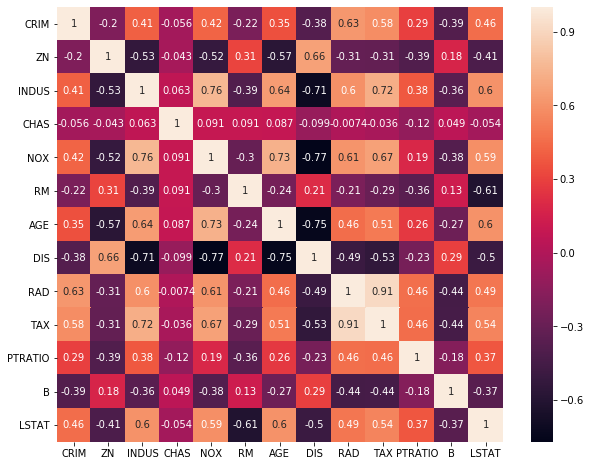

In [53]:
# dataset 1 
corr_matrix(X1)

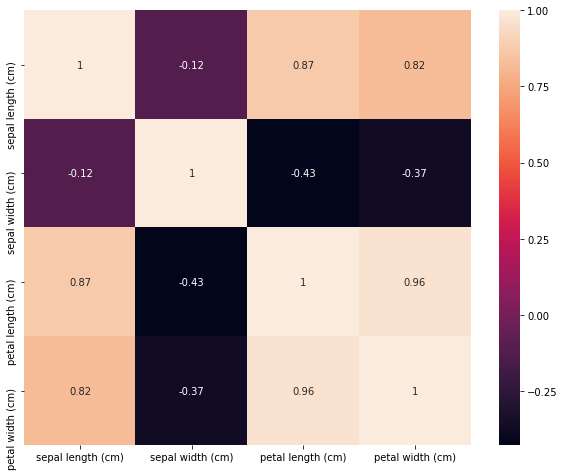

In [54]:
# dataset 2 
corr_matrix(X2)

--Comments--

## Testing assumption 2: Detecting multicollinearity using variance inflation factors


In [55]:
# dataset 1
var_inf_fac(X1)

,features,vif
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [56]:
# dataset 2
var_inf_fac(X2)

,features,vif
0,sepal length (cm),262.969348
1,sepal width (cm),96.353292
2,petal length (cm),172.960962
3,petal width (cm),55.502060


## Testing assumption 3: Linear relation between target and predictor

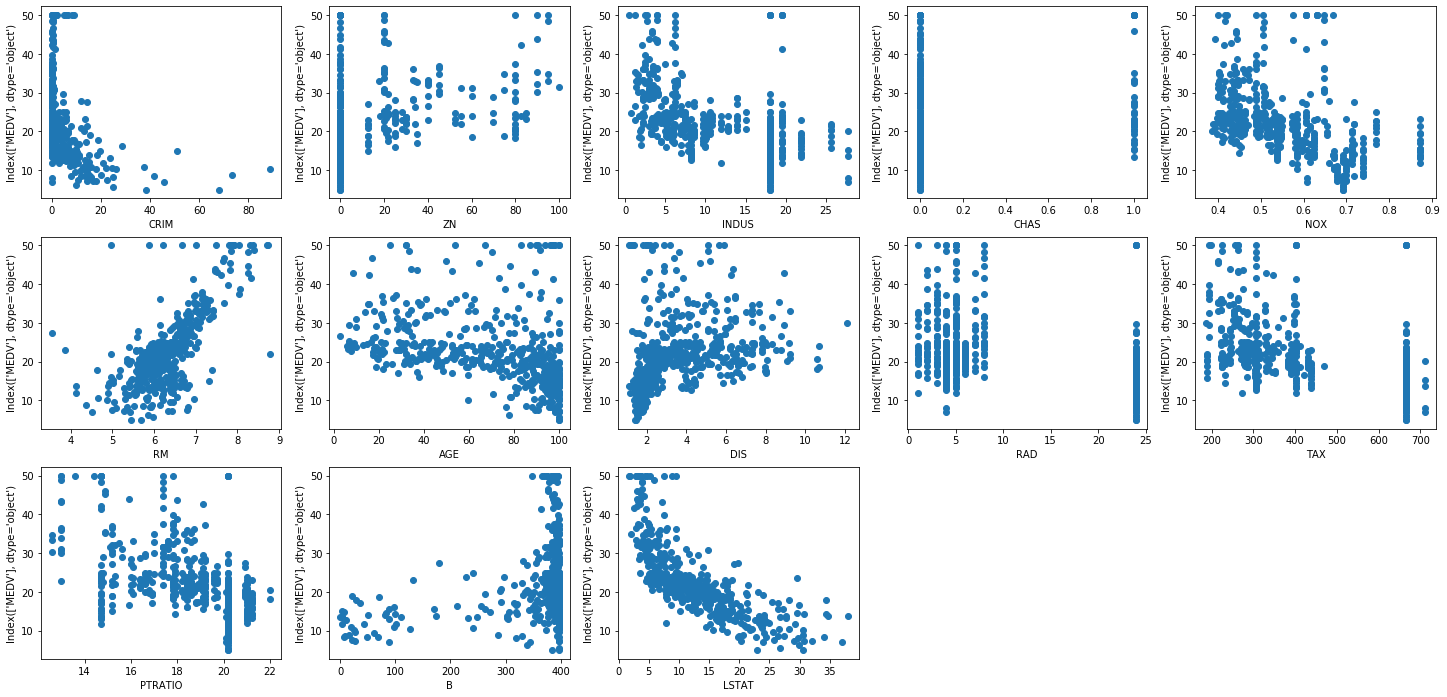

In [57]:
# dataset 1
linear_relation(X1, y1)

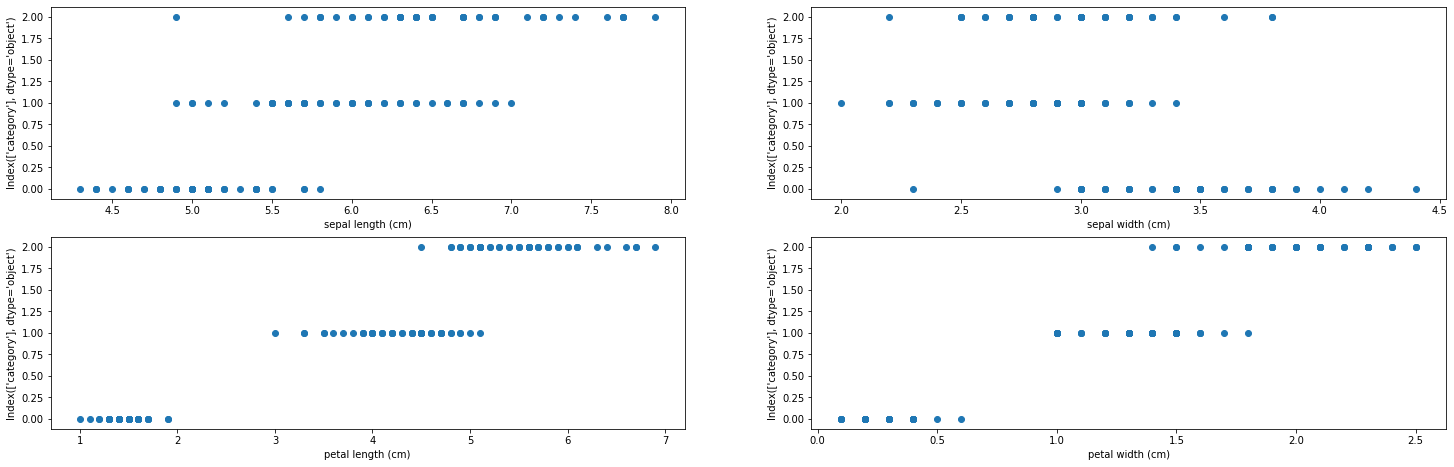

In [58]:
# dataset 2
linear_relation(X2, y2)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

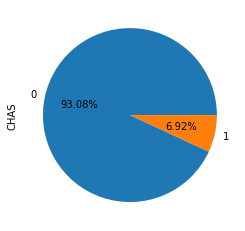

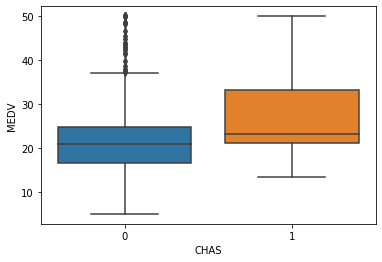

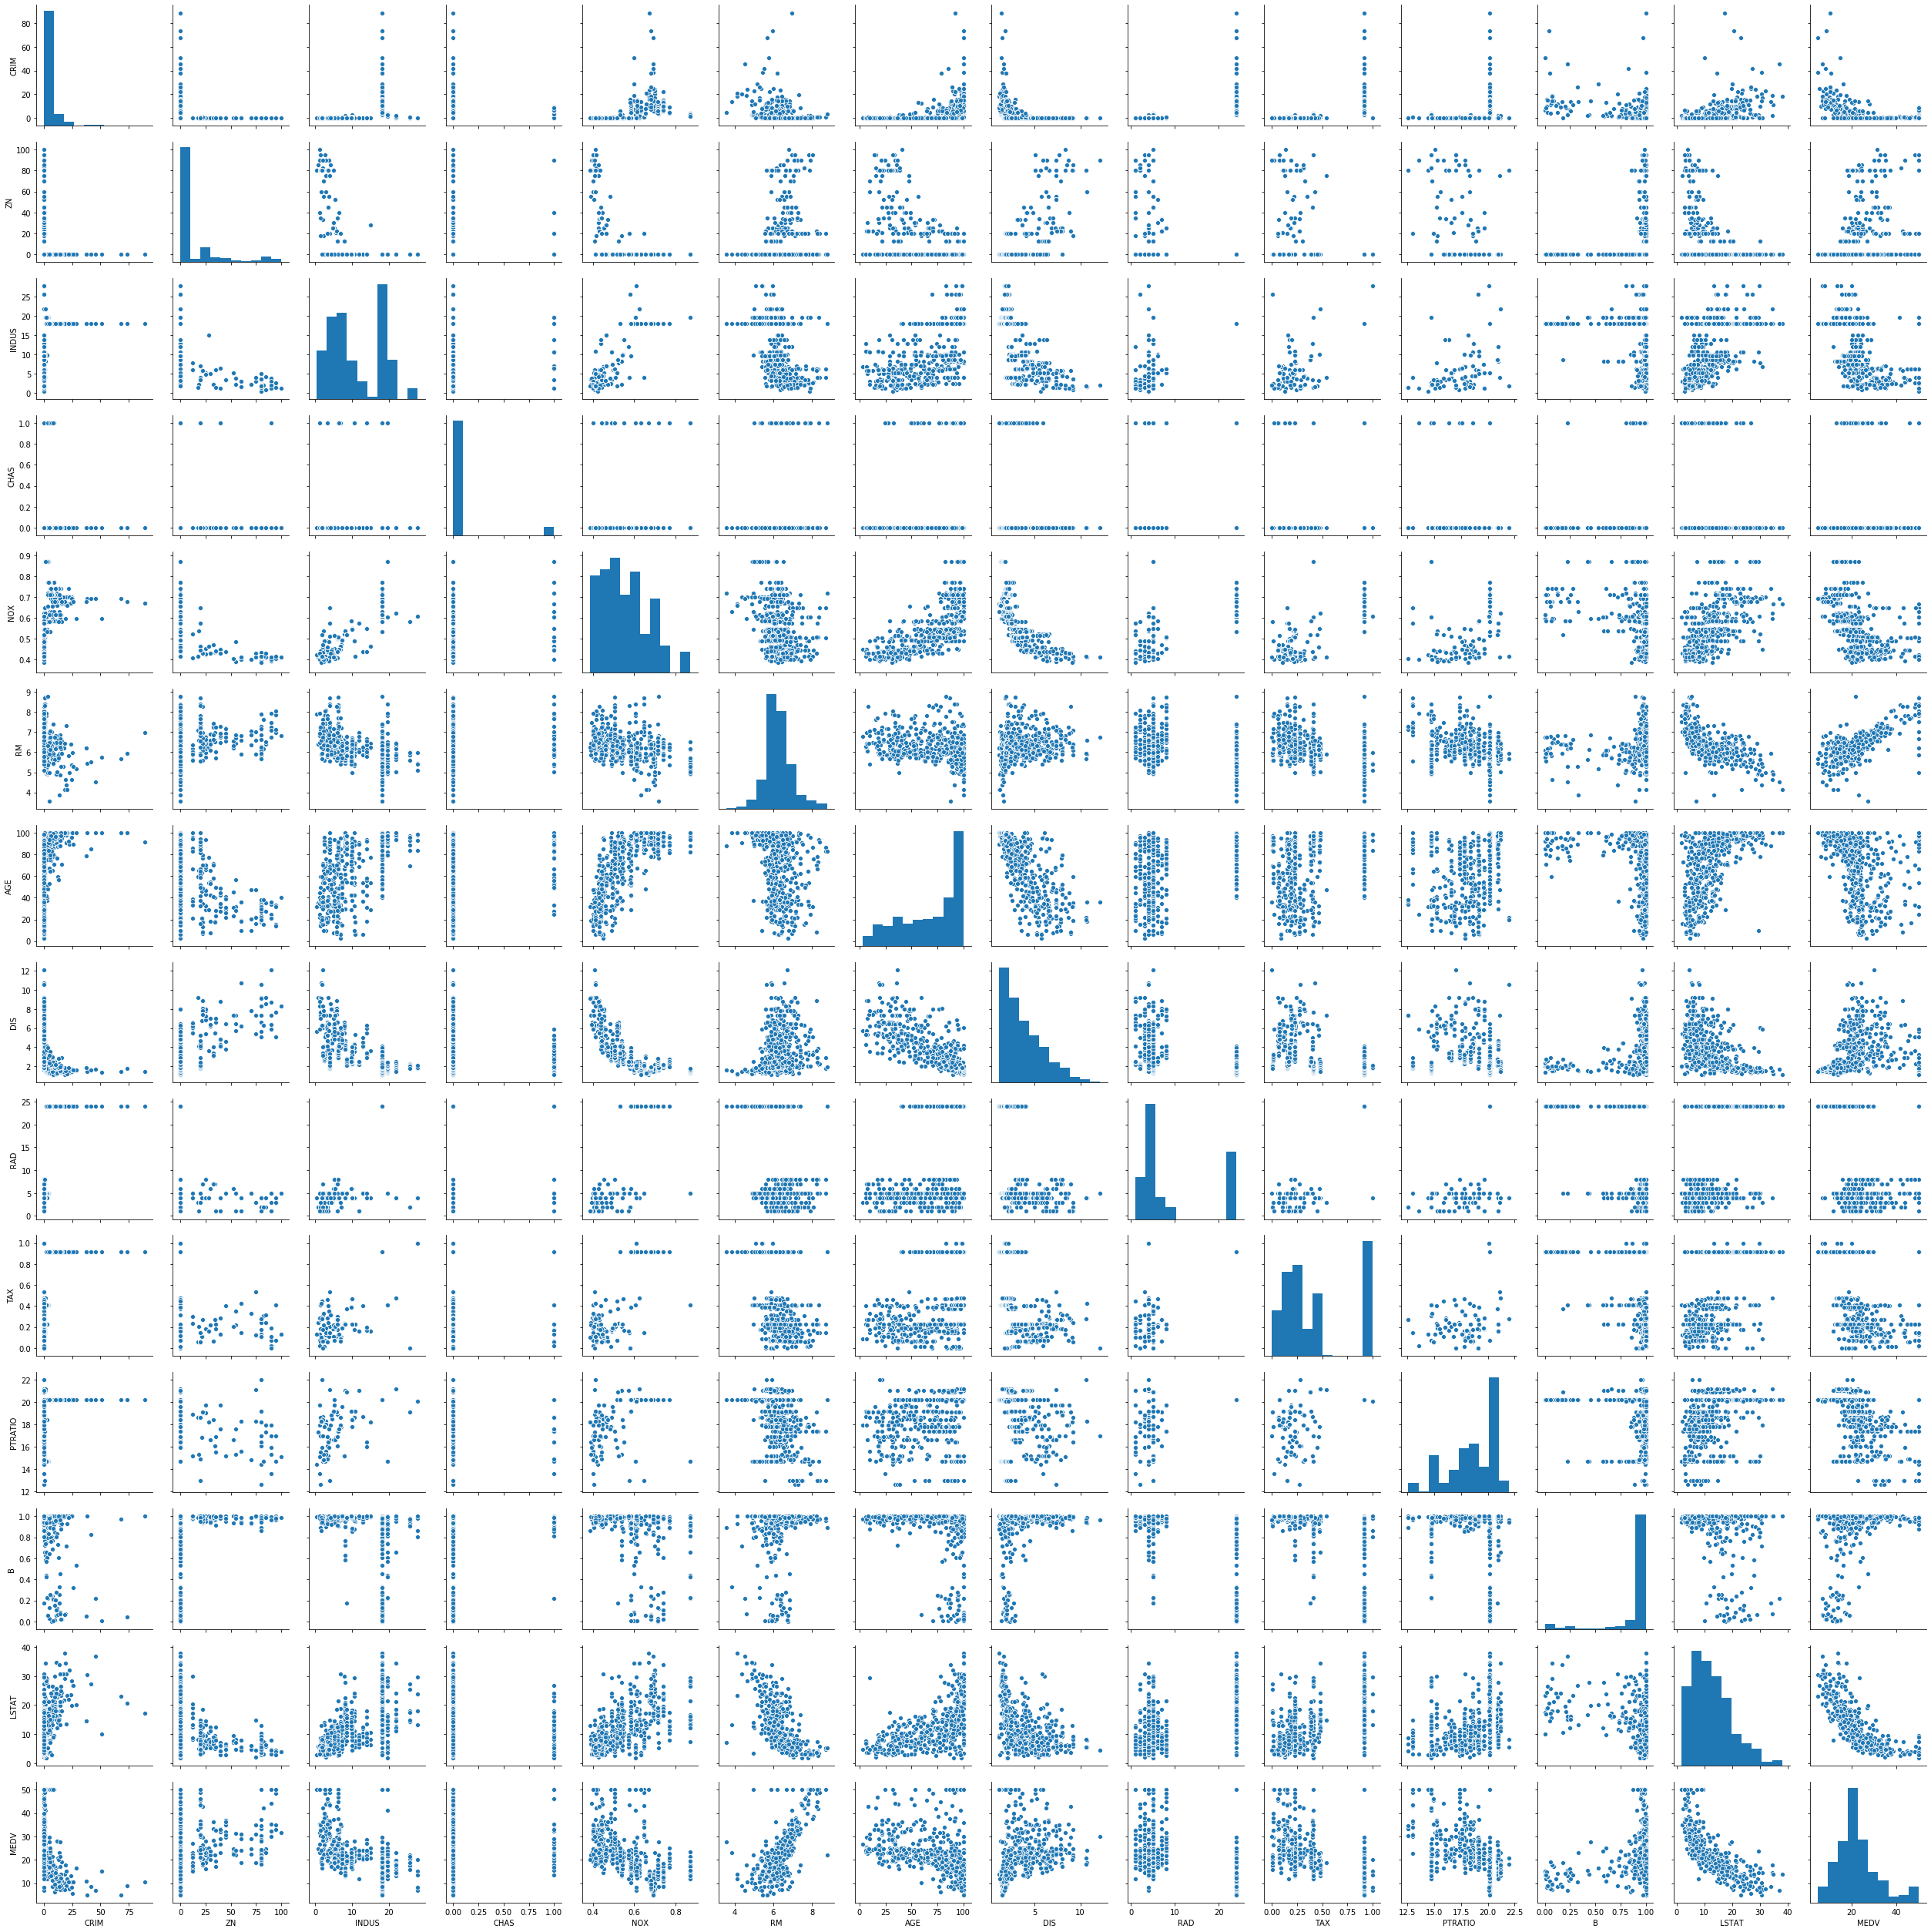

In [64]:
# let's do some Exploratory Data Analysis
%run eda.ipynb

# Please visit the eda.ipynb file to see what we did in eda for the chosen dataset

# Modelling

In [65]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,0.208015,15.3,1.000000,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,0.104962,17.8,1.000000,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,0.104962,17.8,0.989737,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,0.066794,18.7,0.994276,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,0.066794,18.7,1.000000,5.33,36.2
